In [13]:
from coffea import util, hist
import matplotlib.pyplot as plt
import mplhep
plt.style.use(mplhep.style.CMS)

In [23]:
infile_MC = util.load("DataHistograms_2017QCD.coffea")
infile_Sig1 = util.load("DataHistograms_2017Res1ToRes2GluTo3Glu.coffea")
infile_MC.add(infile_Sig1)
display(infile_MC)

{'total_events': defaultdict_accumulator(int,
                         {'QCD_Pt_2400to3200': 1910525,
                          'QCD_Pt_3200toInf': 757837,
                          'QCD_Pt_1800to2400': 2124194,
                          'QCD_Pt_1400to1800': 1733000,
                          'QCD_Pt_1000to1400': 4085260,
                          'QCD_Pt_800to1000': 1905945,
                          'QCD_Pt_600to800': 2667268,
                          'QCD_Pt_300to470': 1799256,
                          'QCD_Pt_470to600': 1755982,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p9': 15997,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p7': 25000,
                          'Res1ToRes2GluTo3Glu_M1-7000_R-0p7': 9999,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p5': 25000,
                          'Res1ToRes2GluTo3Glu_M1-7000_R-0p5': 8000,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p1': 17994,
                          'Res1ToRes2GluT

['mjjj', 'dR_0_12', 'dEta_0_12', 'dPhi_0_12', 'dPt_0_12']

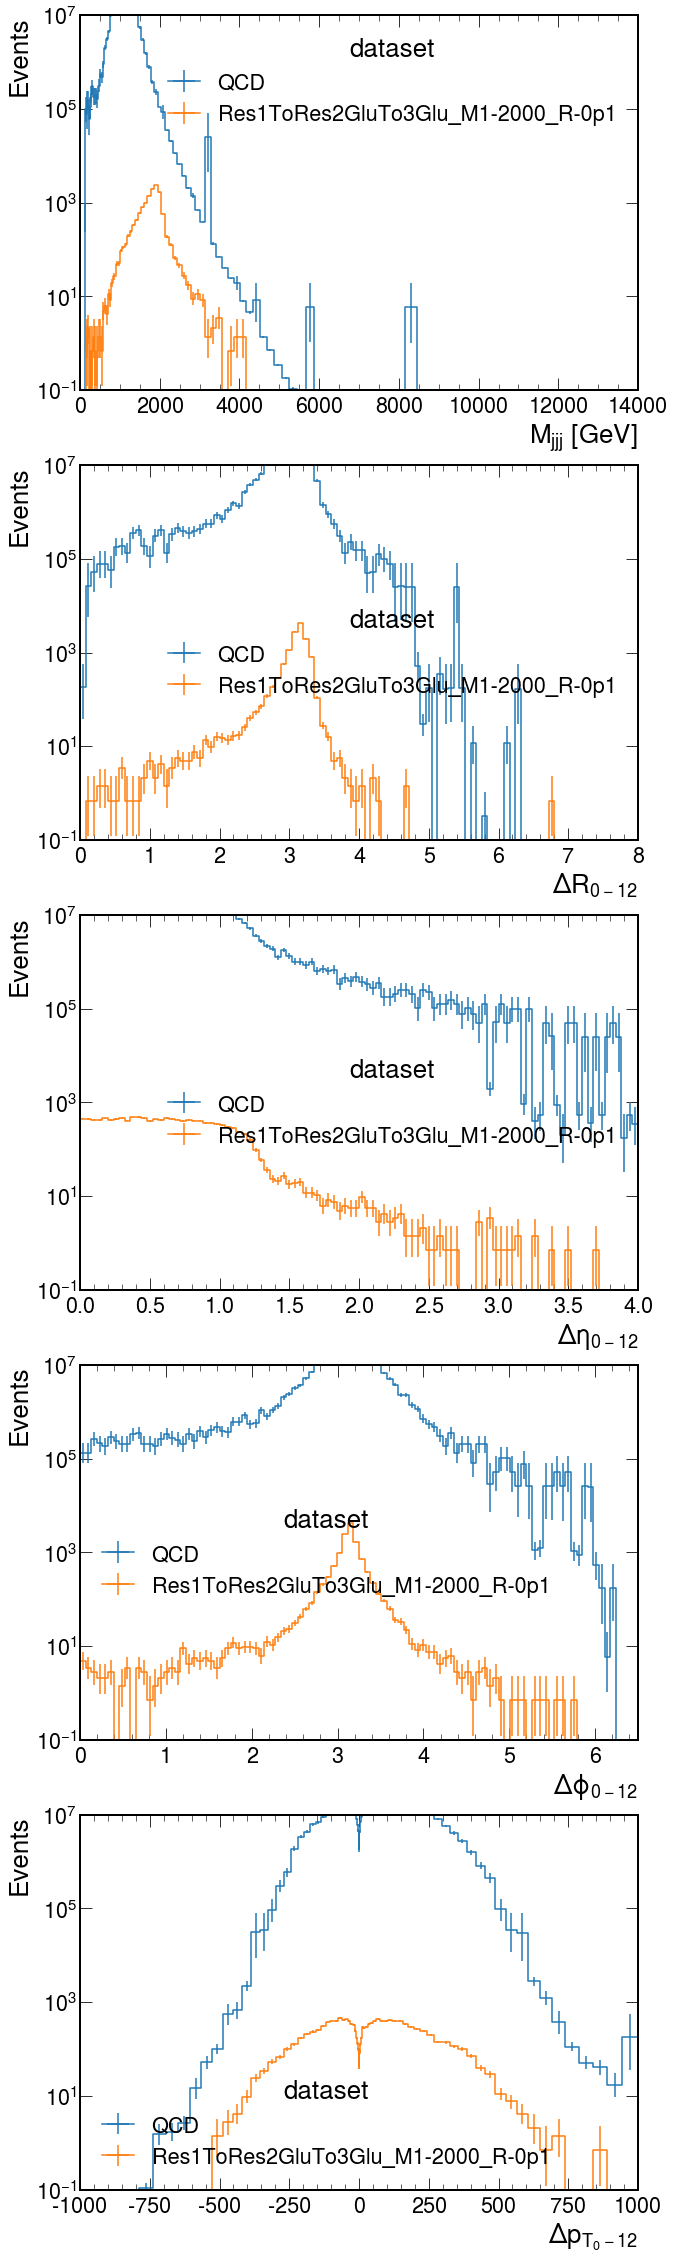

In [25]:
#  ==== List the variables that we want to plot ======
variable_list = []
for variable, accumulator in infile_MC.items():
    if "_i" in variable: # this kind of histos need to be plotted differently
        continue
    variable_list.append(variable)
variable_list.pop(0)

display(variable_list)

# ==== Implement weight of MCs ====
lumi = 41.53*1000
weight_xsec = {
    'QCD_Pt_300to470': lumi*6830/infile_MC["total_events"]["QCD_Pt_300to470"],
    'QCD_Pt_470to600': lumi*552.1/infile_MC["total_events"]["QCD_Pt_470to600"],
    'QCD_Pt_600to800': lumi*156.5/infile_MC["total_events"]["QCD_Pt_600to800"],
    'QCD_Pt_800to1000': lumi*26.28/infile_MC["total_events"]["QCD_Pt_800to1000"],
    'QCD_Pt_1000to1400': lumi*7.47/infile_MC["total_events"]["QCD_Pt_1000to1400"],
    'QCD_Pt_1400to1800': lumi*0.6484/infile_MC["total_events"]["QCD_Pt_1400to1800"],
    'QCD_Pt_1800to2400': lumi*0.08743/infile_MC["total_events"]["QCD_Pt_1800to2400"],
    'QCD_Pt_2400to3200': lumi*0.005236/infile_MC["total_events"]["QCD_Pt_2400to3200"],
    'QCD_Pt_3200toInf': lumi*0.0001357/infile_MC["total_events"]["QCD_Pt_3200toInf"],
}
weight_sigMC1 = {}
for name, N_evt in infile_MC["total_events"].items():
    if "QCD" in name:
        continue
    weight_sigMC1[name] = lumi/N_evt
weight_xsec.update(weight_sigMC1)
# display(weight_xsec)

# ==== Group datasets that we want to plot ====
QCD_entries = []
for name, N_evt in infile_MC["total_events"].items():
    if "QCD" in name:
        QCD_entries.append(name)
# print(QCD_entries)

mapping = {}
mapping["QCD"] = QCD_entries

Sig_entries = ["Res1ToRes2GluTo3Glu_M1-2000_R-0p1"]
for sig in Sig_entries:
    mapping[sig] = sig
    
# display(mapping)

# ==== Plotting ====

axis2integrate = "selection"
selection2plot = ["pre-selection"]

fig, ax = plt.subplots(len(variable_list), 1, figsize=(10,len(variable_list)*8))
ax_counter = 0
for variable in variable_list:
    histo = infile_MC[variable]
    histo.scale(weight_xsec, axis='dataset')
    ih = histo.integrate(axis2integrate,selection2plot)
    ih = ih.group("dataset", hist.Cat("sel_dataset", "dataset"), mapping)
    plot = hist.plot1d(ih, ax=ax[ax_counter])
    plot.set_ylim(0.1,10000000)
    plot.set_yscale('log')
    if "dPt_0_12" in variable:
        plot.set_xlim(-1000,1000)
    ax_counter+=1

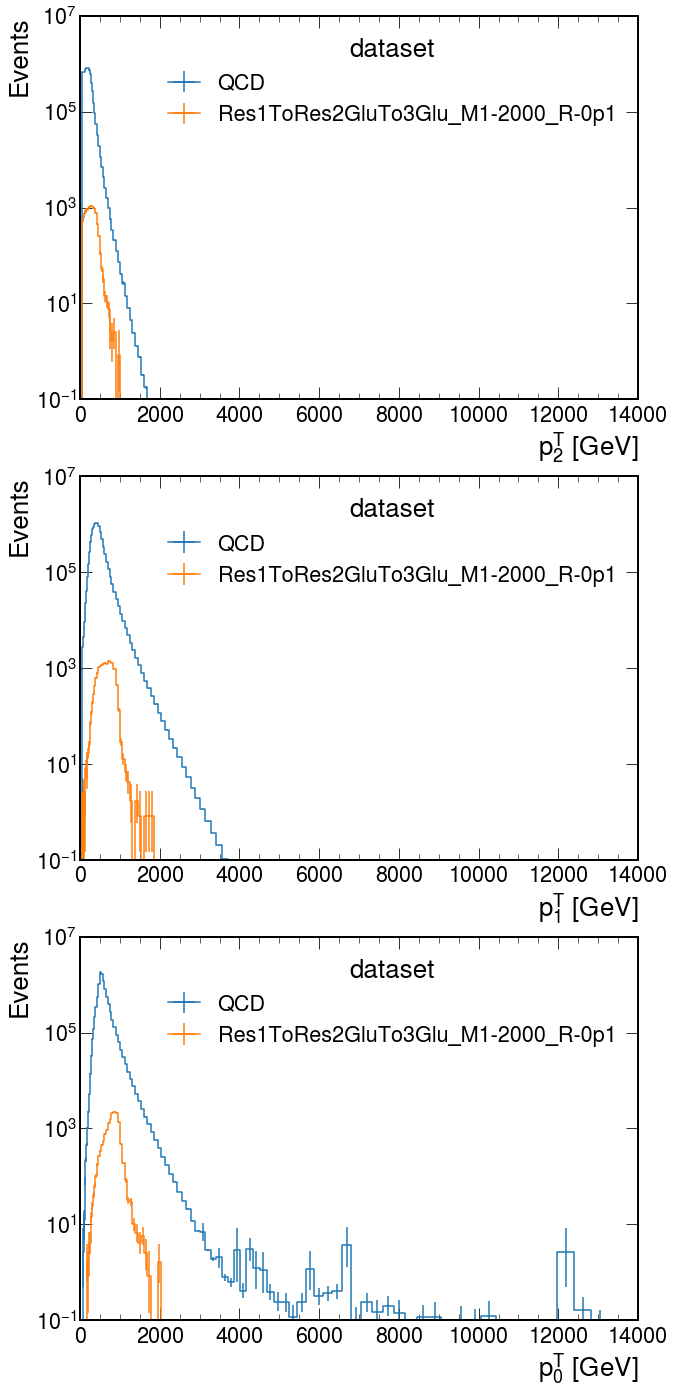

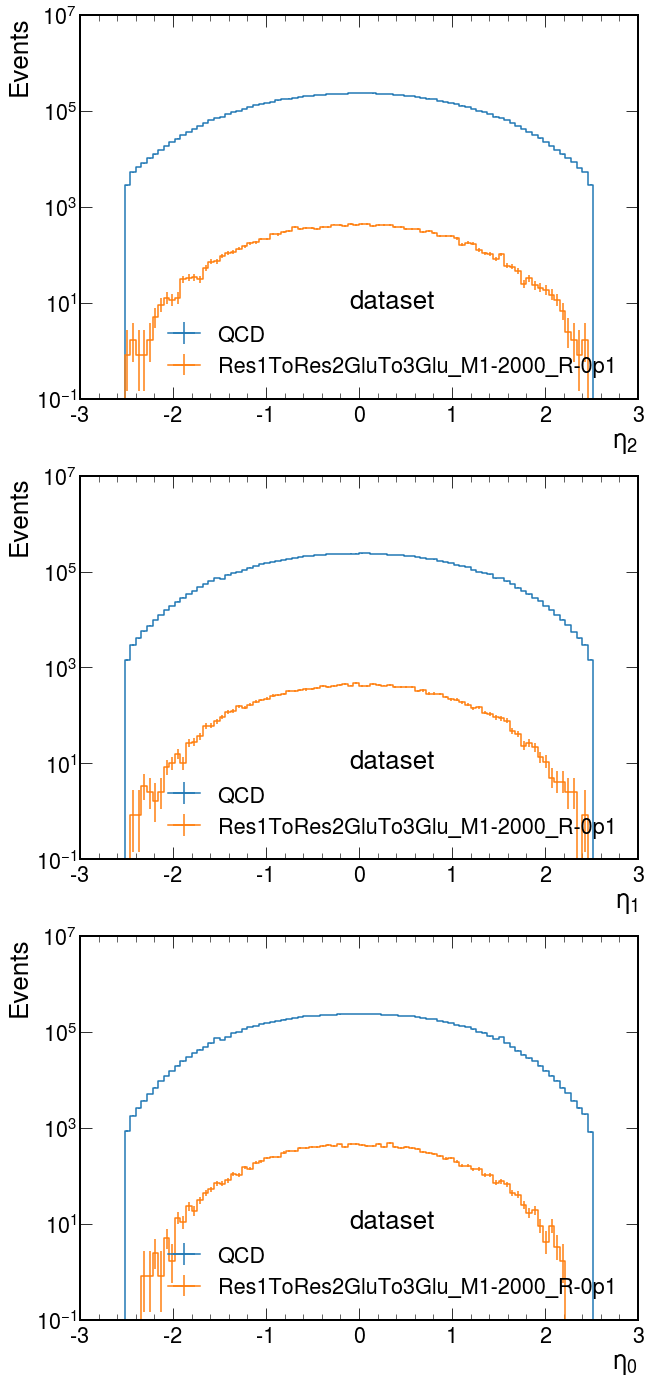

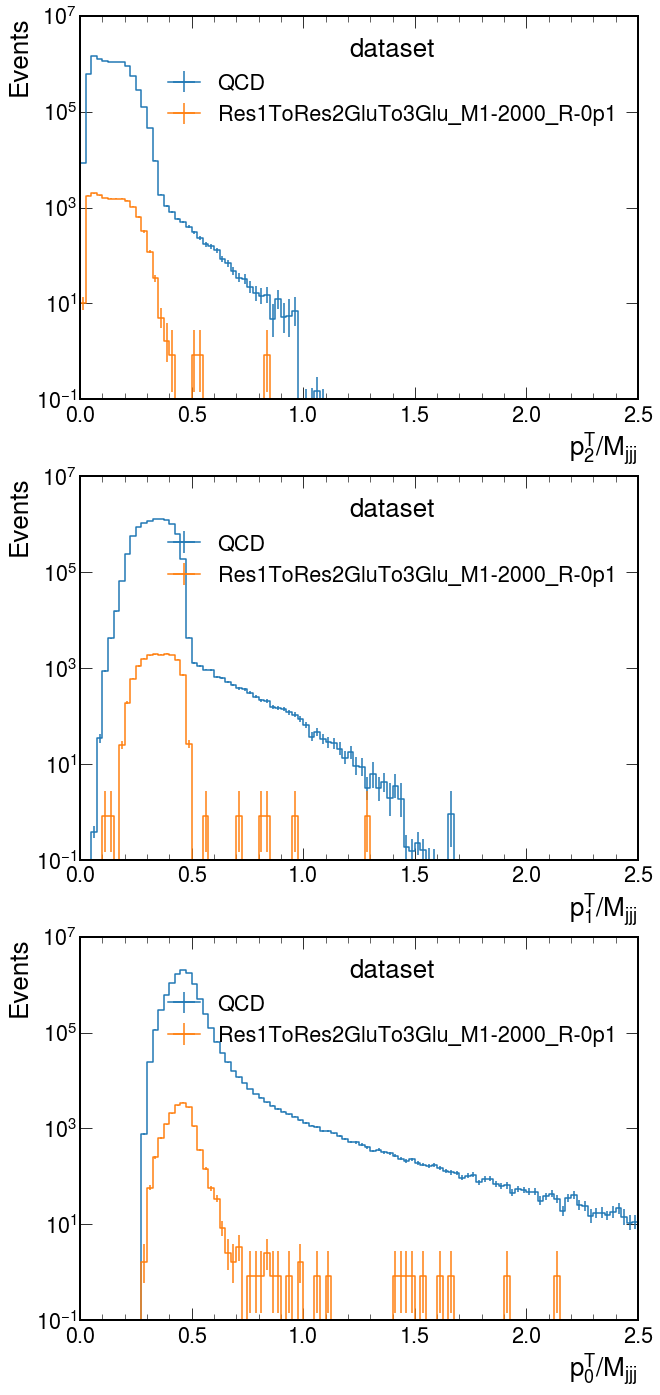

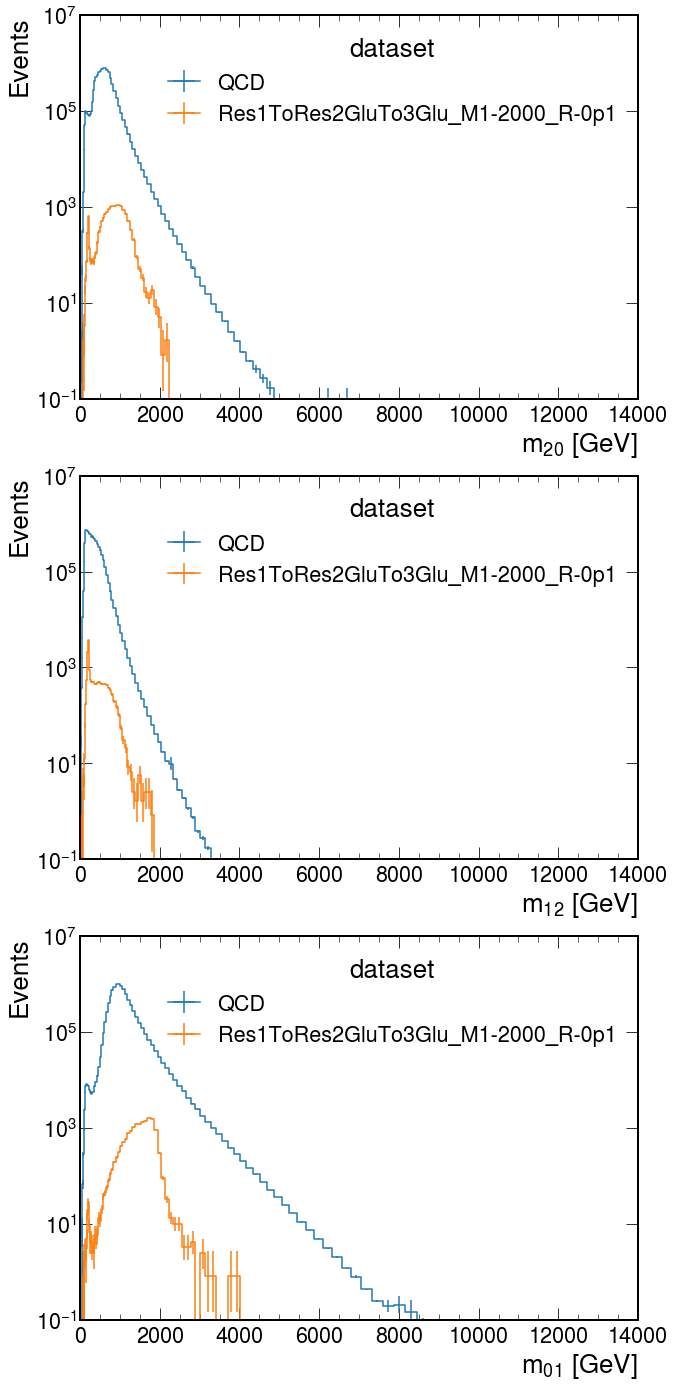

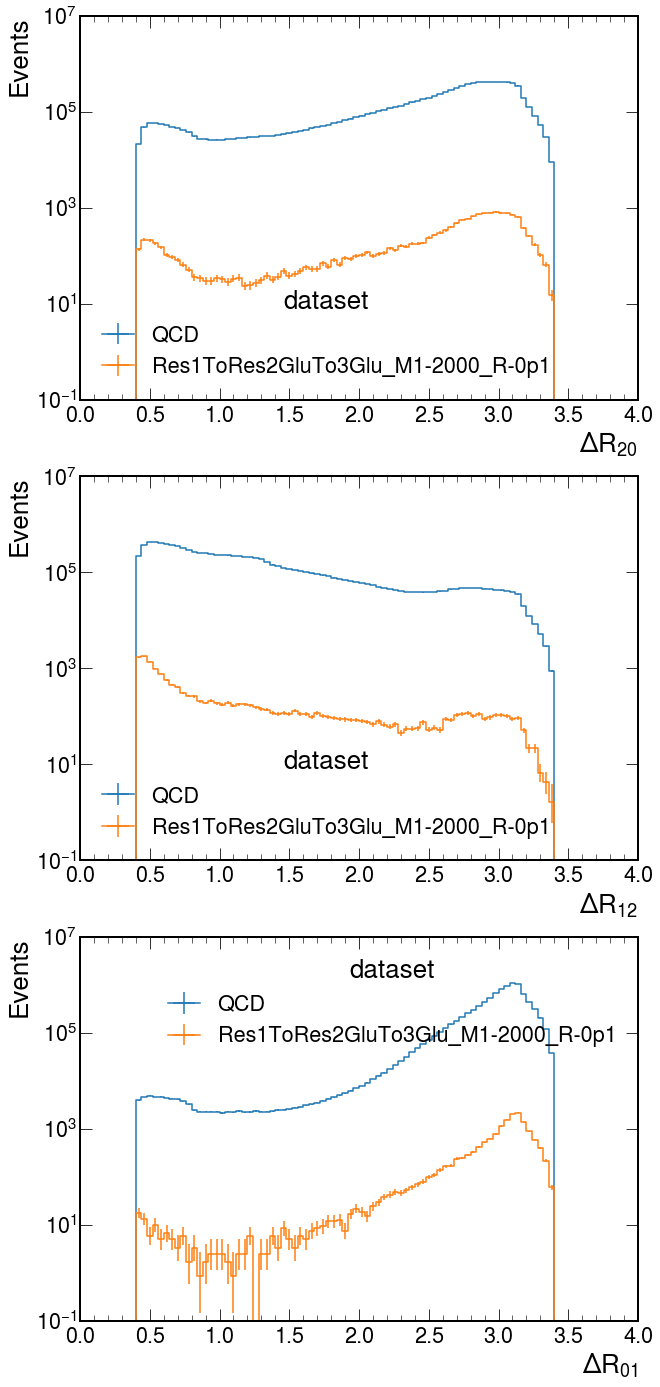

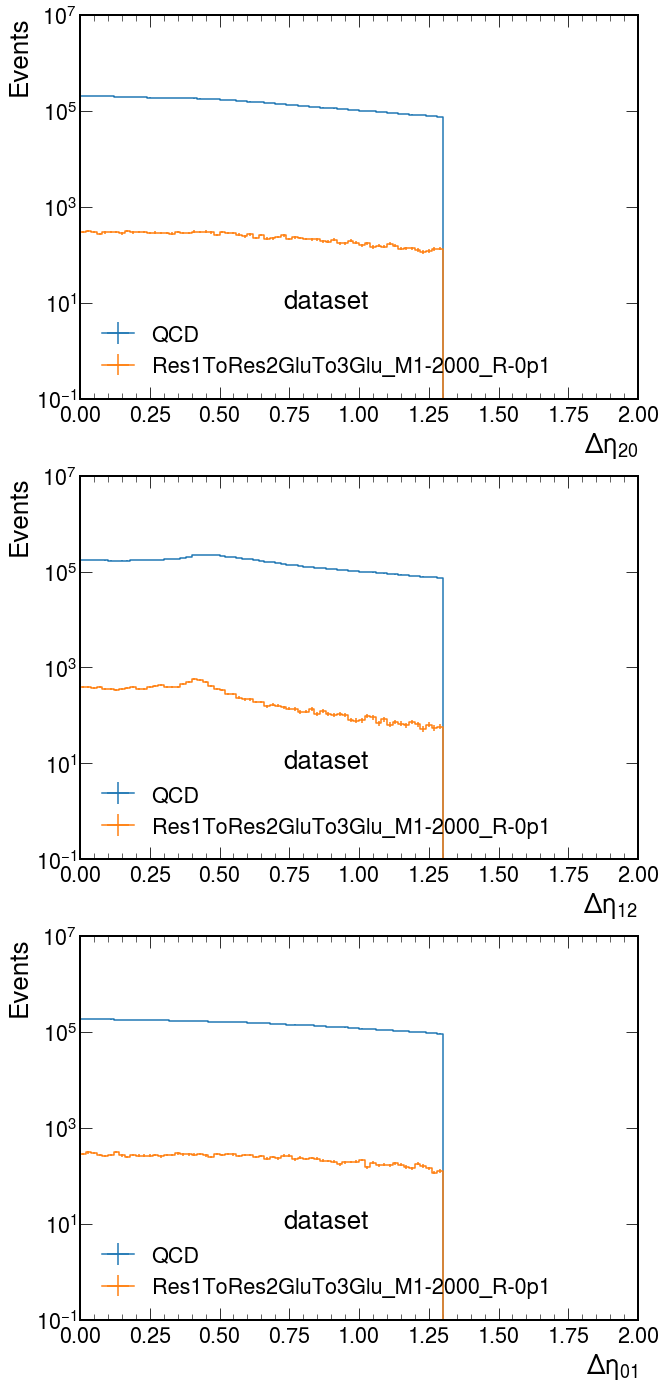

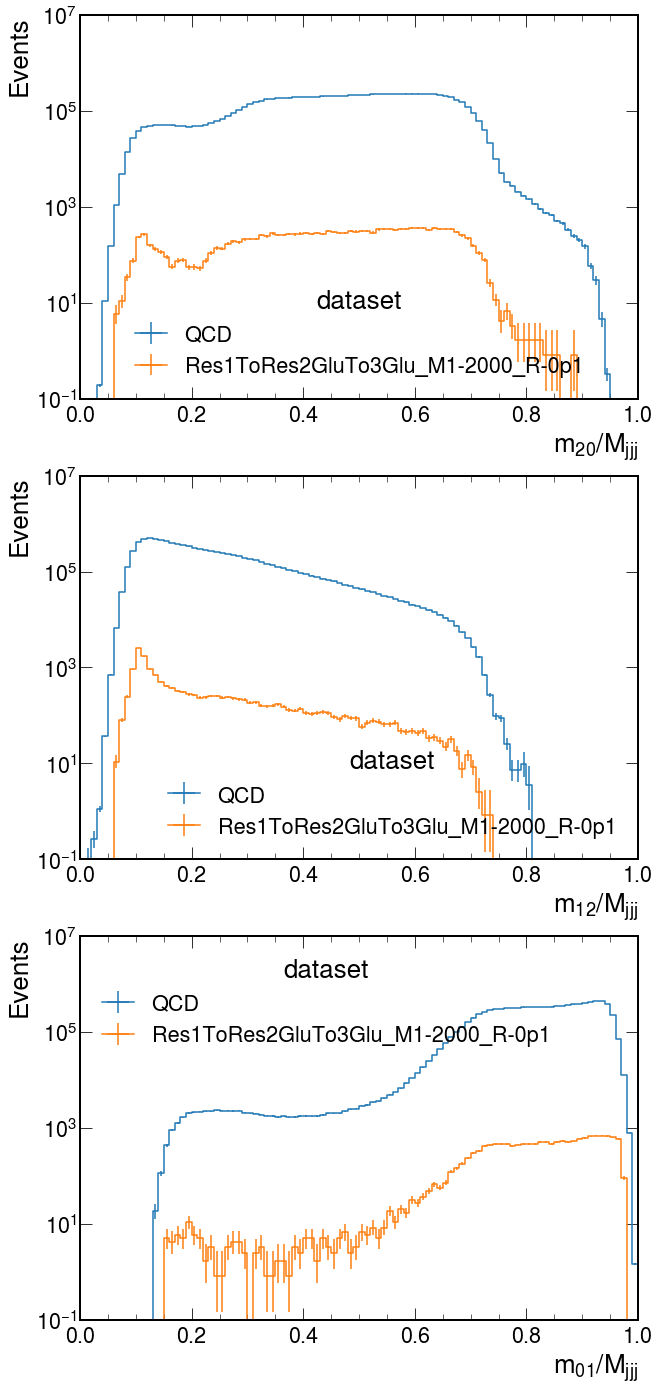

In [12]:
def plot_ij(variable2plot, variable_list): # this can also plot _i variables
    fig, ax = plt.subplots(3, 1, figsize=(10,24))
    ax_counter = 0
    for pair in itertools.combinations(variable_list,2):
        histo = infile_MC[variable2plot].copy()
        histo.scale(weight_xsec, axis='dataset')
        ih = histo.group("dataset", hist.Cat("sel_dataset", "dataset"), mapping)
        plot = hist.plot1d(ih, ax=ax[ax_counter])
        plot.set_ylim(0.1,10000000)
        plot.set_yscale('log')
        if variable2plot is "pt_i" or "m_ij":
            plot.set_xlim(0,6000)
        ax_counter+=1
    
import itertools

variable2plot = "eta_i"
variable_list = ["eta_0","eta_1","eta_2"]
plot_ij(variable2plot, variable_list)
variable2plot = "ptoverM_i"
variable_list = ["ptoverM_0","ptoverM_1","ptoverM_2"]
plot_ij(variable2plot, variable_list)
variable2plot = "dR_ij"
variable_list = ["dR_01","dR_12","dR_20"]
plot_ij(variable2plot, variable_list)
variable2plot = "dEta_ij"
variable_list = ["dEta_01","dEta_12","dEta_20"]
plot_ij(variable2plot, variable_list)
variable2plot = "moverM_ij"
variable_list = ["moverM_01","moverM_12","moverM_20"]
plot_ij(variable2plot, variable_list)
## These two need to be plotted at the end since they want different x range, which just can not be done by autoscale...
variable2plot = "pt_i"
variable_list = ["pt_0","pt_1","pt_2"]
plot_ij(variable2plot, variable_list)
variable2plot = "m_ij"
variable_list = ["m_01","m_12","m_20"]
plot_ij(variable2plot, variable_list)

['m_12', 'm_20']


<Hist (m_01,m_20) instance at 0x7f18cf0e09d0>

['m_01', 'm_20']


<Hist (m_12,m_20) instance at 0x7f18cf0e0850>

['m_01', 'm_12']


<Hist (m_12,m_20) instance at 0x7f18ced2c310>

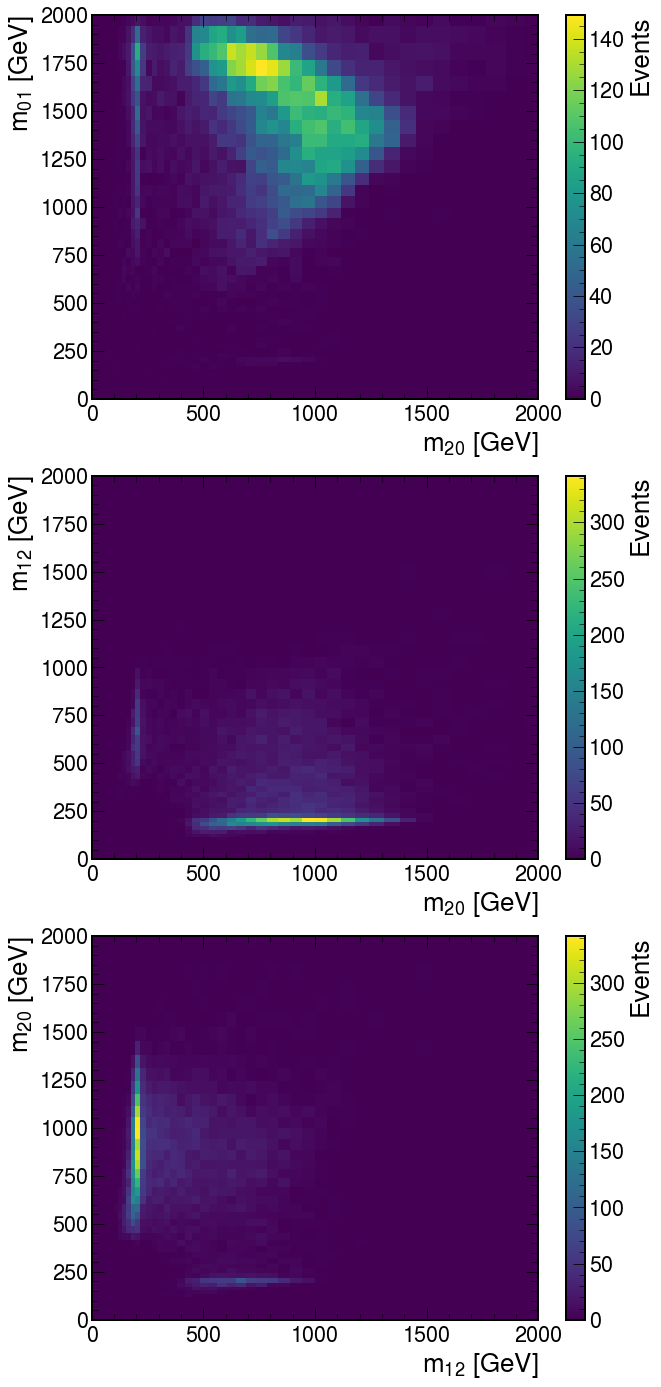

In [49]:
def plot_scatter(variable2plot, variable_list, dataset):
    fig, ax = plt.subplots(3, 1, figsize=(10,24))
    ax_counter = 0
    for ivar in variable_list:
        pair = variable_list.copy()
        pair.remove(ivar)
        histo = infile_MC[variable2plot].copy()
        histo.scale(weight_xsec, axis='dataset')
        ih = histo.integrate(axis2integrate,selection2plot).integrate("dataset",["Res1ToRes2GluTo3Glu_M1-2000_R-0p1"]).integrate(pair[0])
        display(ih)
        plot = hist.plot2d(ih, xaxis=pair[1], ax=ax[ax_counter])
        if variable2plot is "m_ij":
            plot.set_xlim(0,2000)
            plot.set_ylim(0,2000)
        ax_counter+=1
    
variable2plot = "m_ij"
variable_list = ["m_01","m_12","m_20"]
plot_scatter(variable2plot, variable_list, "Res1ToRes2GluTo3Glu_M1-2000_R-0p1")